In [39]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import requests
import datetime


# 日本語フォントのパスを指定（使用するフォントに応じてパスを変更してください）
font_path = "C:\Windows\Fonts\msyh.ttc"
# フォントマネージャにフォントを登録
font_prop = fm.FontProperties(fname=font_path)

In [15]:
# ファイルの結合
channel = "atsuhiko_nakata"

file_paths = []
for i in range(15):
    file_paths.append(f"data/{channel}/{channel}_comments{i}.json")

# 空のリストを作成して、各JSONファイルの内容を読み込み、結合する
merged_data = myf.merge_json(file_paths)

# 結合したデータを新しいJSONファイルに保存
merged_file_path = f"data/{channel}/{channel}_comments.json"
with open(merged_file_path, "w", encoding="utf-8") as file:
    json.dump(merged_data, file, ensure_ascii=False)
print(len(merged_data))

In [109]:
channel = "jinguji_ai_"
file_path = f"data/{channel}/{channel}"
video_path = f"{file_path}_videos.json"

df_videos = myf.read_json(video_path)
df_videos['viewCount'] = pd.to_numeric(df_videos['viewCount'], errors='coerce')
df_videos['likeCount'] = pd.to_numeric(df_videos['likeCount'], errors='coerce')
df_videos['commentCount'] = pd.to_numeric(df_videos['commentCount'], errors='coerce')
df_videos['publishedDate'] = df_videos['publishedDate'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))

# trailer_df = video_df[video_df['title'].str.contains('Trailer')]
comment_path = f"{file_path}_comments.json"
df_comments = myf.read_json(comment_path)
df_comments['likeCount'] = pd.to_numeric(df_comments['likeCount'], errors='coerce')
df_comments['replyCount'] = pd.to_numeric(df_comments['replyCount'], errors='coerce')
df_comments['commentDate'] = df_comments['commentDate'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))

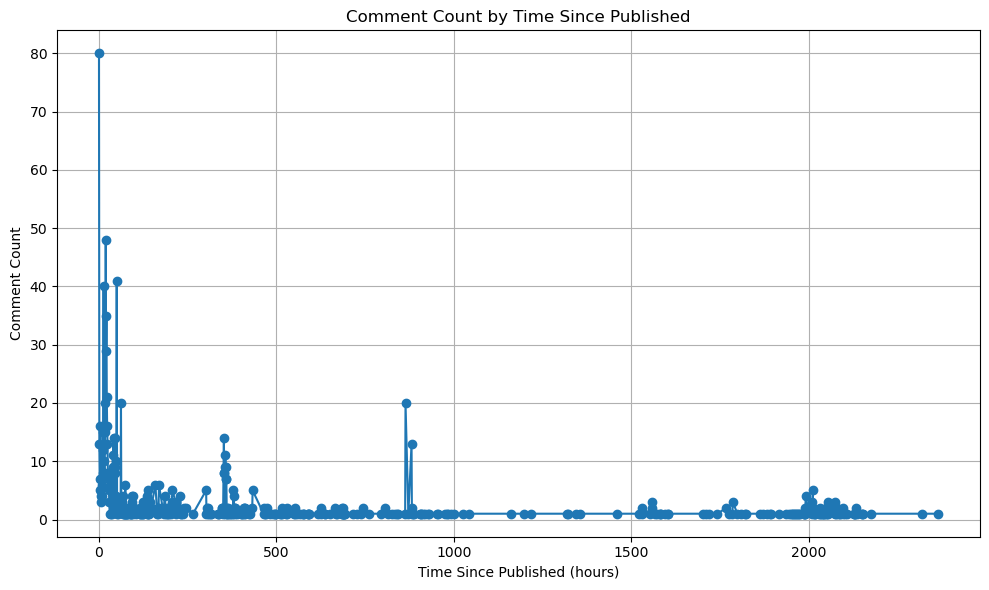

In [130]:
# 動画情報とコメント情報を結合
merged_df = pd.merge(df_comments, df_videos, on='videoId')

# 動画が投稿されてからの時間差を計算
merged_df['time_since_published'] = (merged_df['commentDate'] - merged_df['publishedDate']).dt.total_seconds() / 3600  # 時間単位
merged_df['time_since_published'] = merged_df['time_since_published'].astype(int)

# 時間ごとにコメント数を集計
comment_count_by_time = merged_df.groupby('time_since_published').size()

# グラフを作成して表示
plt.figure(figsize=(10, 6))
plt.plot(comment_count_by_time.index, comment_count_by_time.values, marker='o')
plt.xlabel('Time Since Published (hours)')
plt.ylabel('Comment Count')
plt.title('Comment Count by Time Since Published')
plt.grid()
plt.tight_layout()
plt.show()

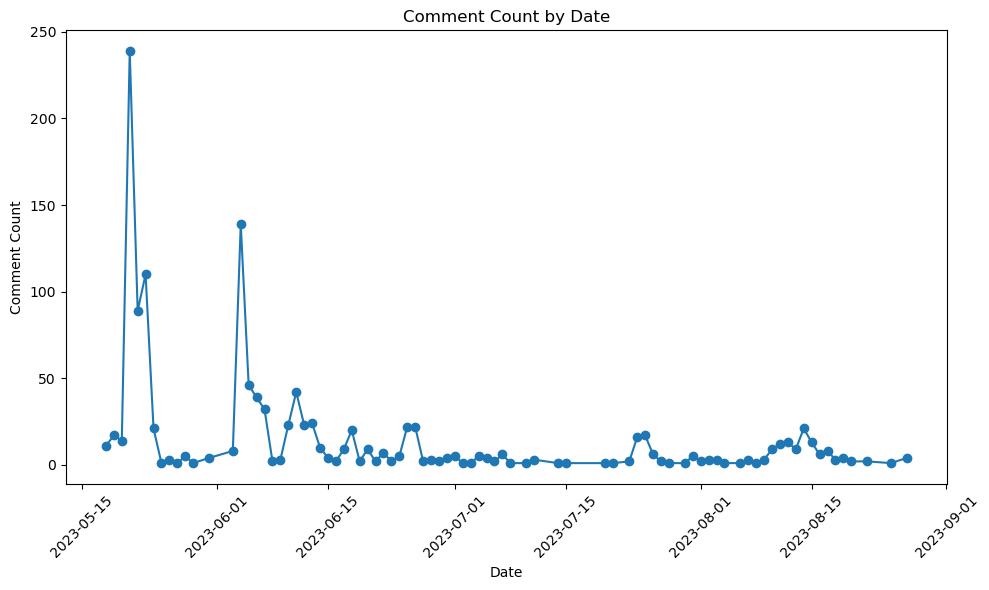

In [110]:
# 日付ごとにコメント数を集計
comment_count_by_date = df_comments.groupby(comments['commentDate'].dt.date).size()

# グラフを作成して表示
plt.figure(figsize=(10, 6))
plt.plot(comment_count_by_date.index, comment_count_by_date.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Comment Count')
plt.title('Comment Count by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

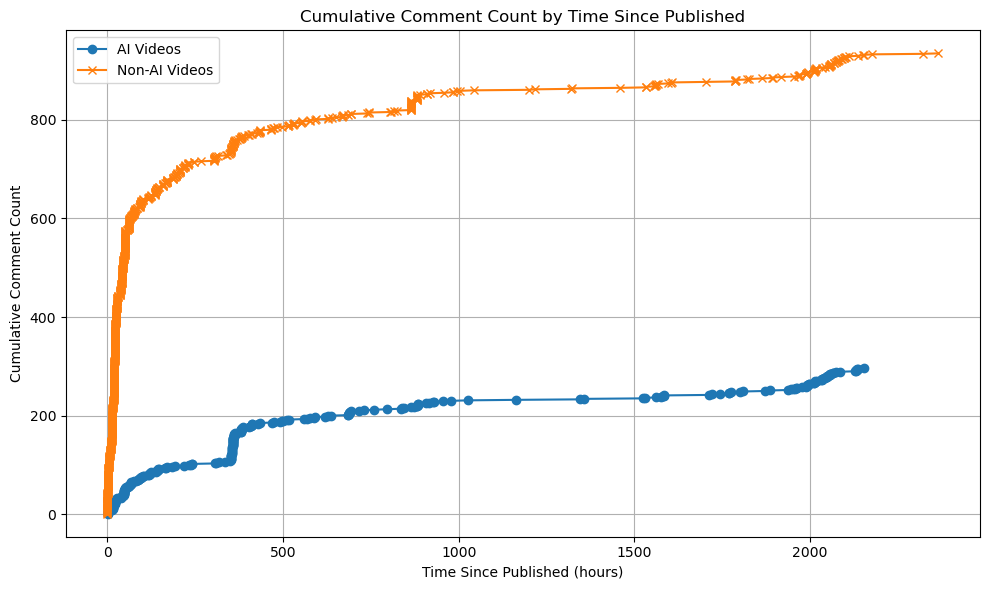

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# 動画情報とコメント情報を結合
merged_df = pd.merge(df_comments, df_videos, on='videoId')

# 動画が投稿されてからの時間差を計算
merged_df['time_since_published'] = (merged_df['commentDate'] - merged_df['publishedDate']).dt.total_seconds() / 3600  # 時間単位

# 'AI'という文字列が含まれているかどうかを判定する列を追加
merged_df['contains_ai'] = merged_df['text'].str.contains('AI', case=False)

# 'AI'を含む動画のデータ
ai_videos = merged_df[merged_df['contains_ai']]
# 'AI'を含まない動画のデータ
non_ai_videos = merged_df[~merged_df['contains_ai']]

# 動画ごとにコメント数を集計（AIを含む動画）
ai_comment_count_by_time = ai_videos.groupby('time_since_published').size().cumsum()
# 動画ごとにコメント数を集計（AIを含まない動画）
non_ai_comment_count_by_time = non_ai_videos.groupby('time_since_published').size().cumsum()

# グラフを作成して表示
plt.figure(figsize=(10, 6))
plt.plot(ai_comment_count_by_time.index, ai_comment_count_by_time.values, marker='o', label='AI Videos')
plt.plot(non_ai_comment_count_by_time.index, non_ai_comment_count_by_time.values, marker='x', label='Non-AI Videos')
plt.xlabel('Time Since Published (hours)')
plt.ylabel('Cumulative Comment Count')
plt.title('Cumulative Comment Count by Time Since Published')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

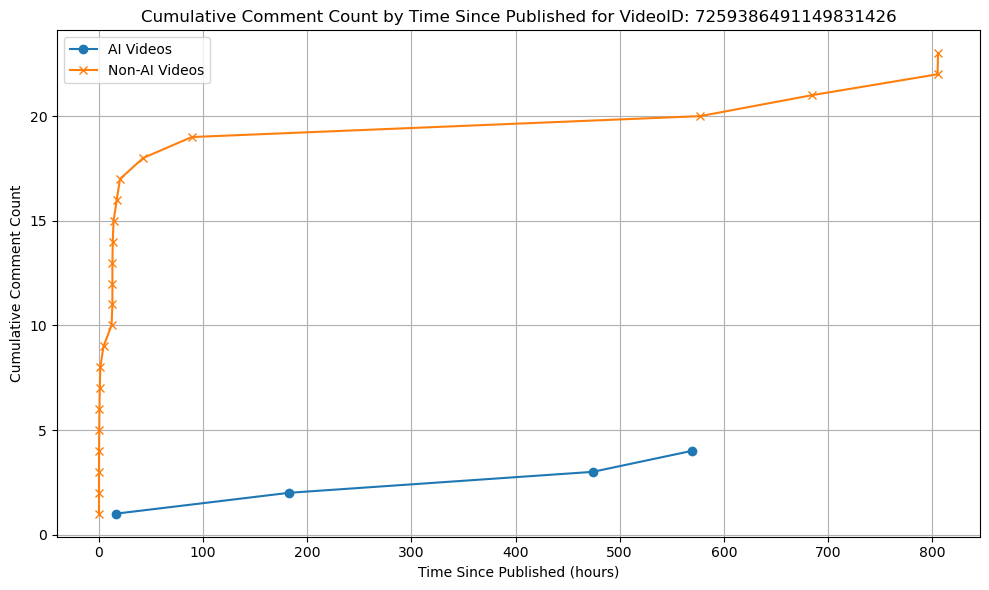

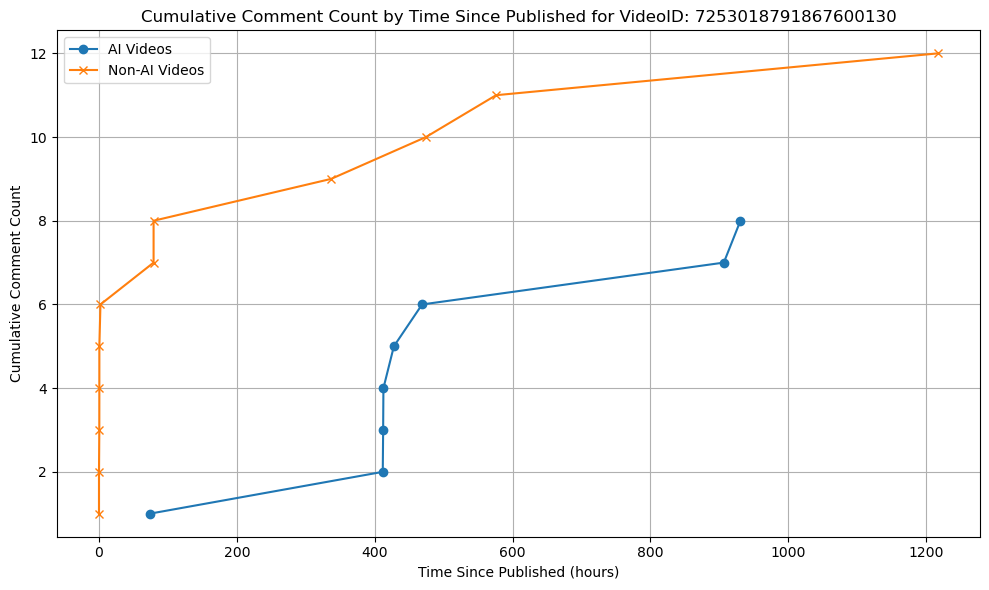

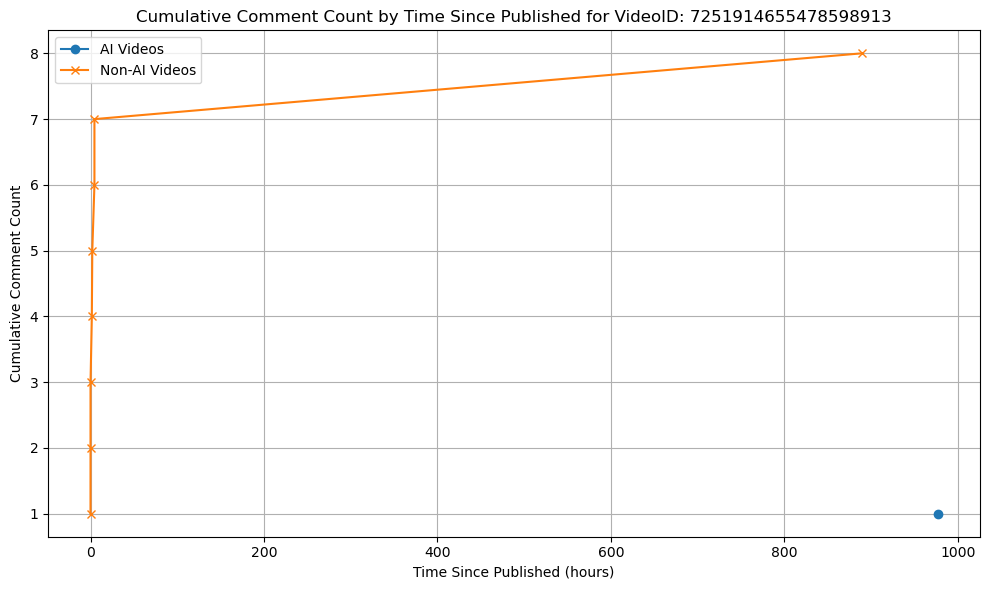

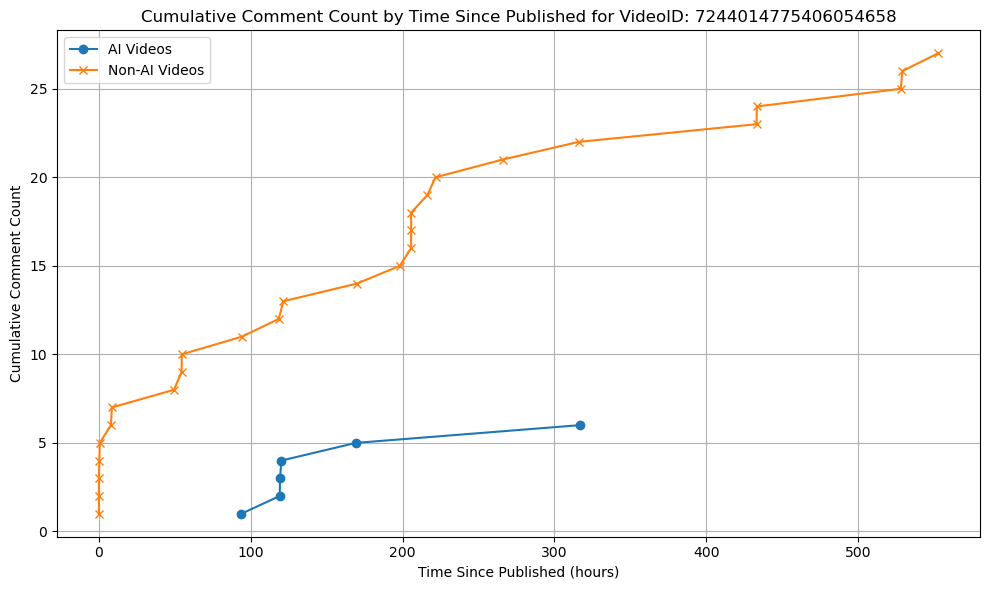

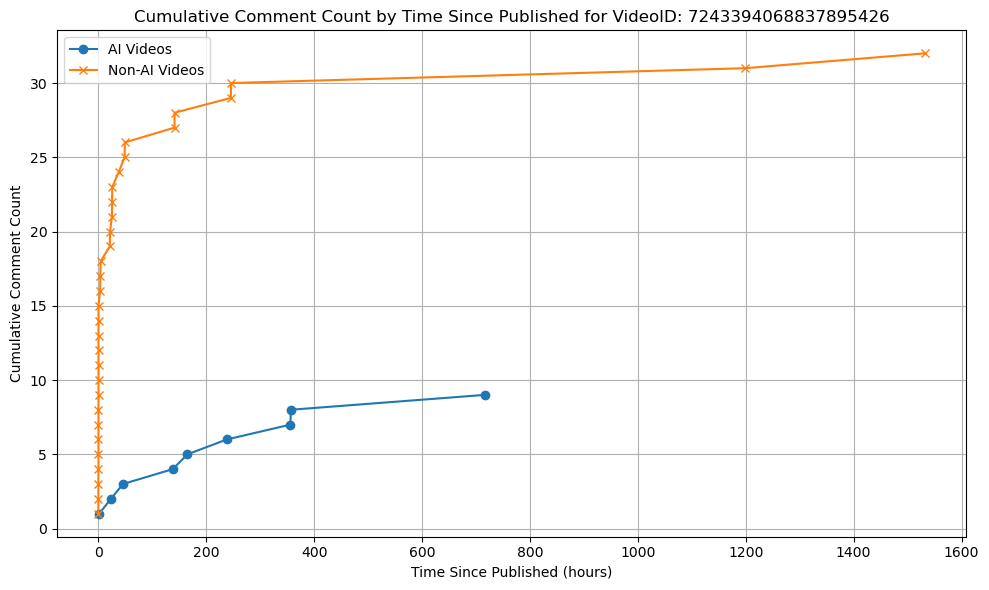

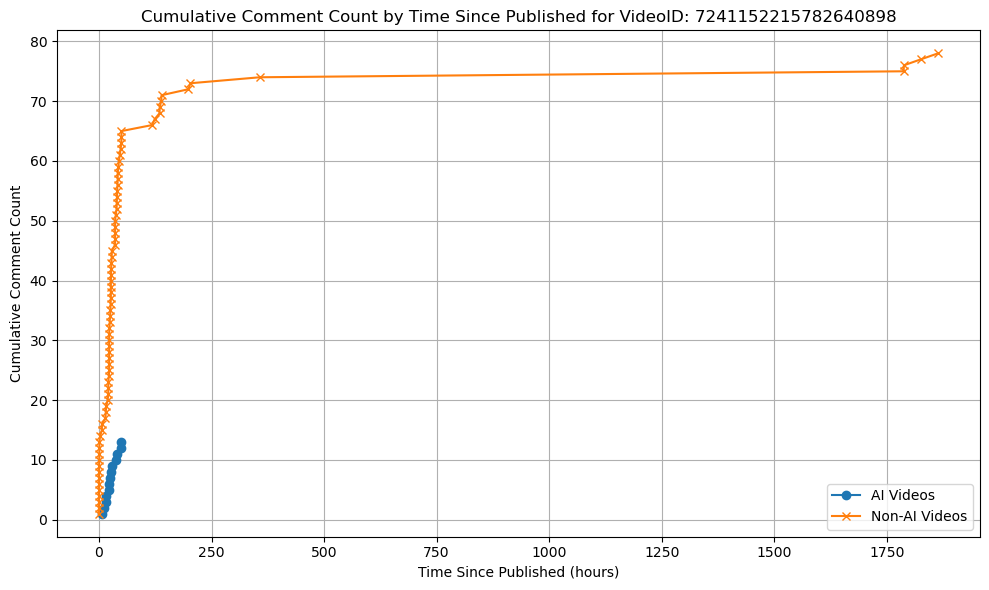

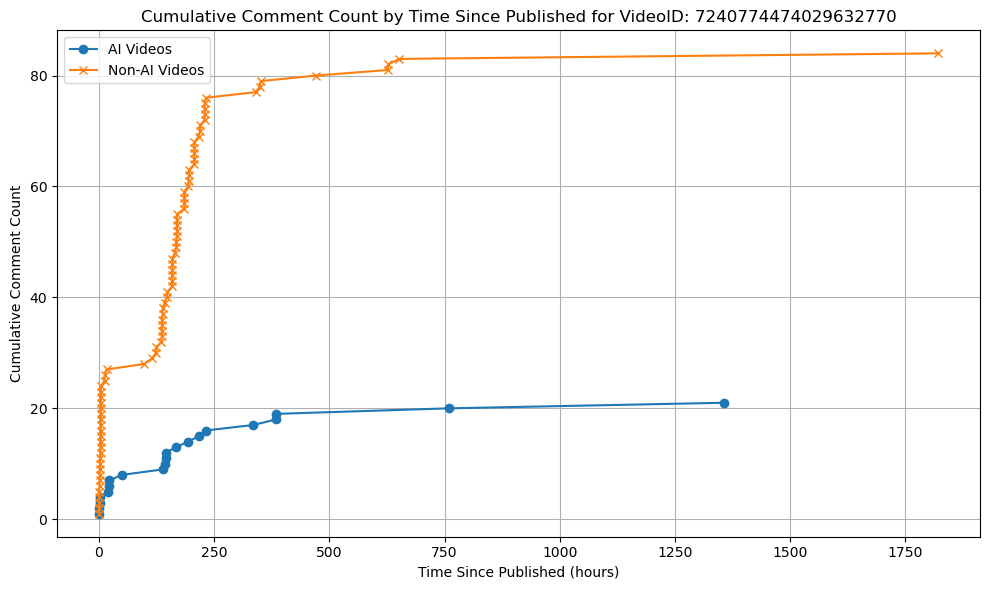

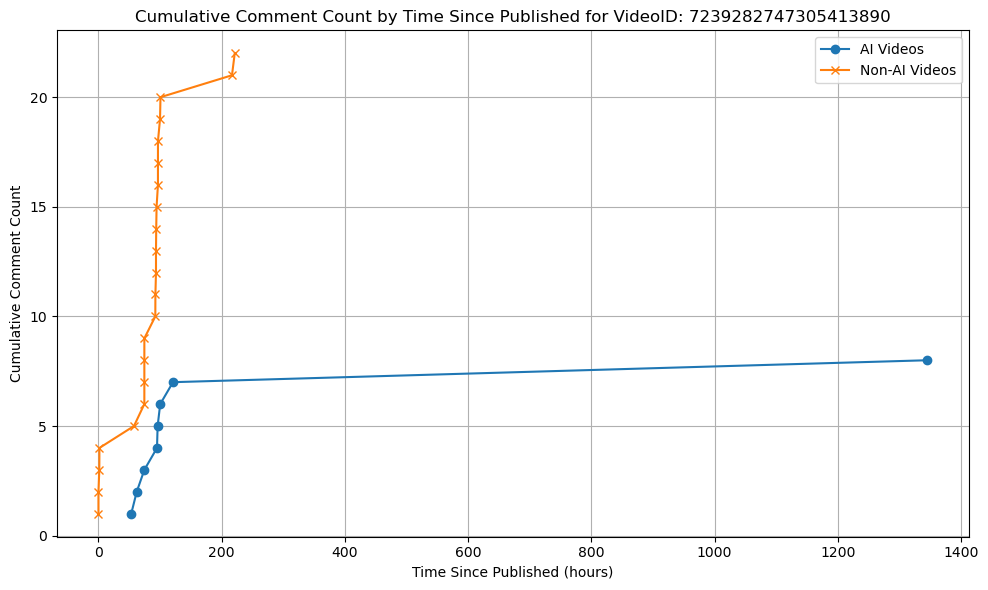

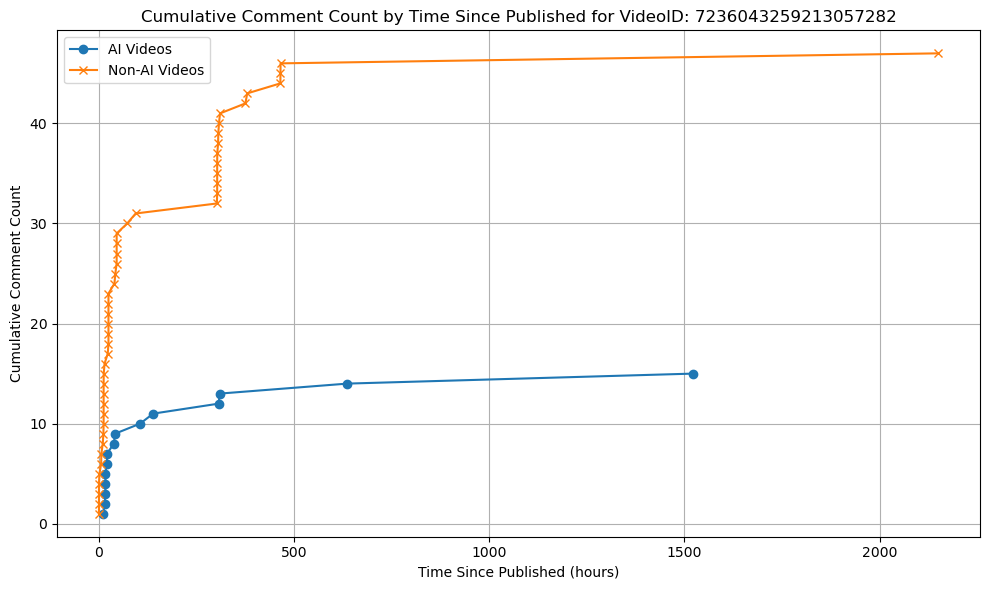

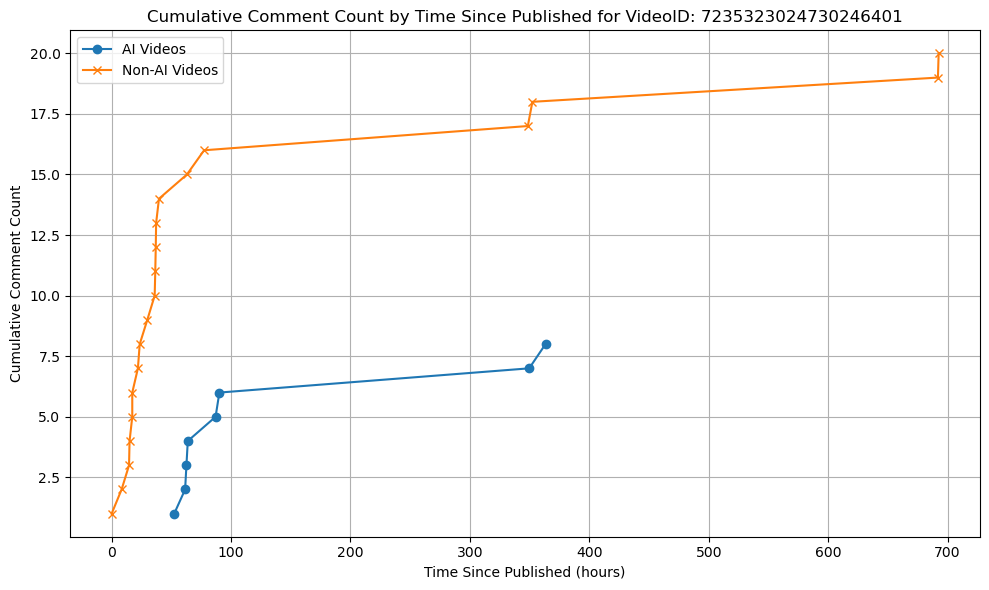

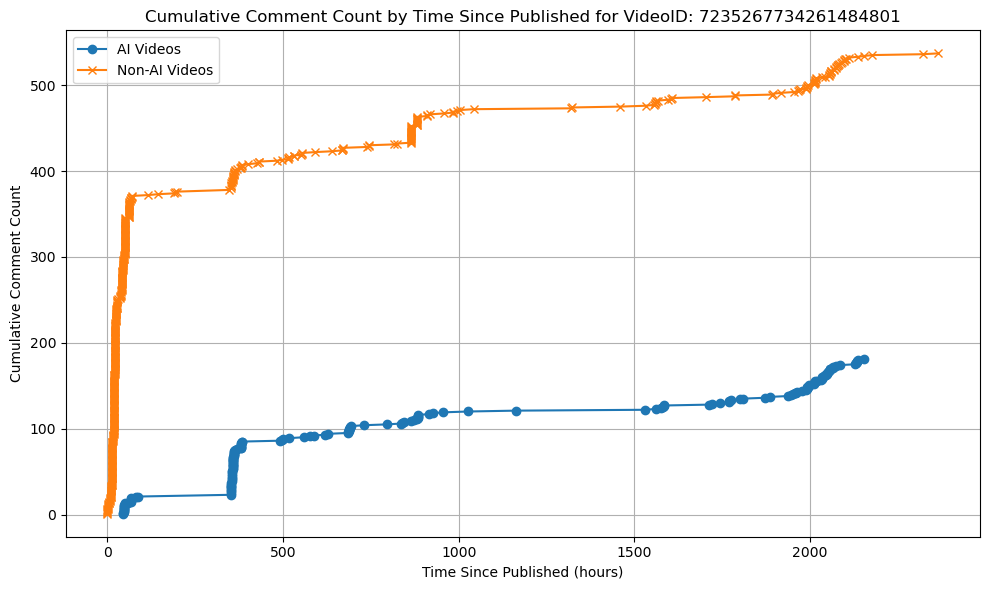

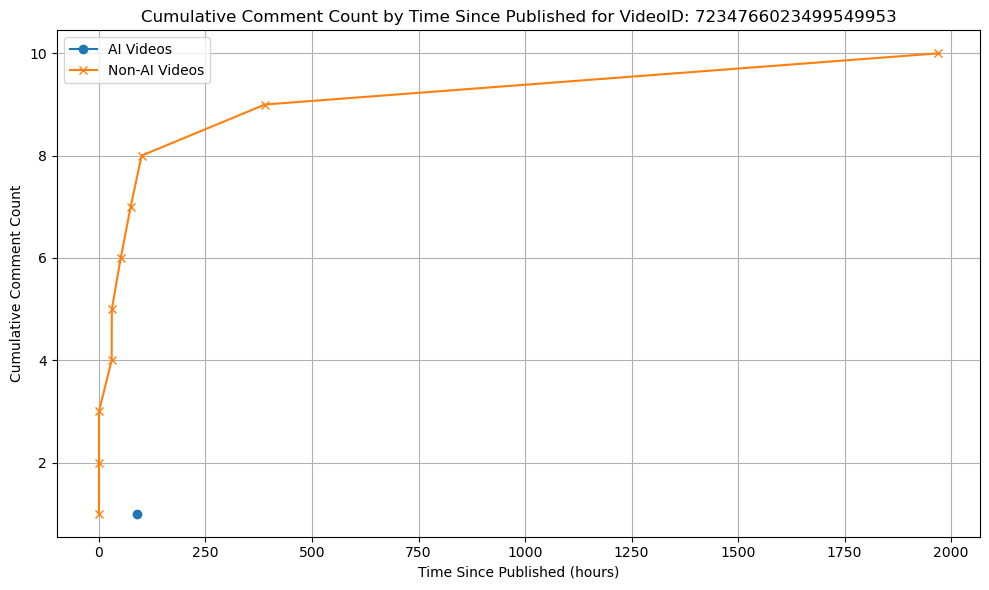

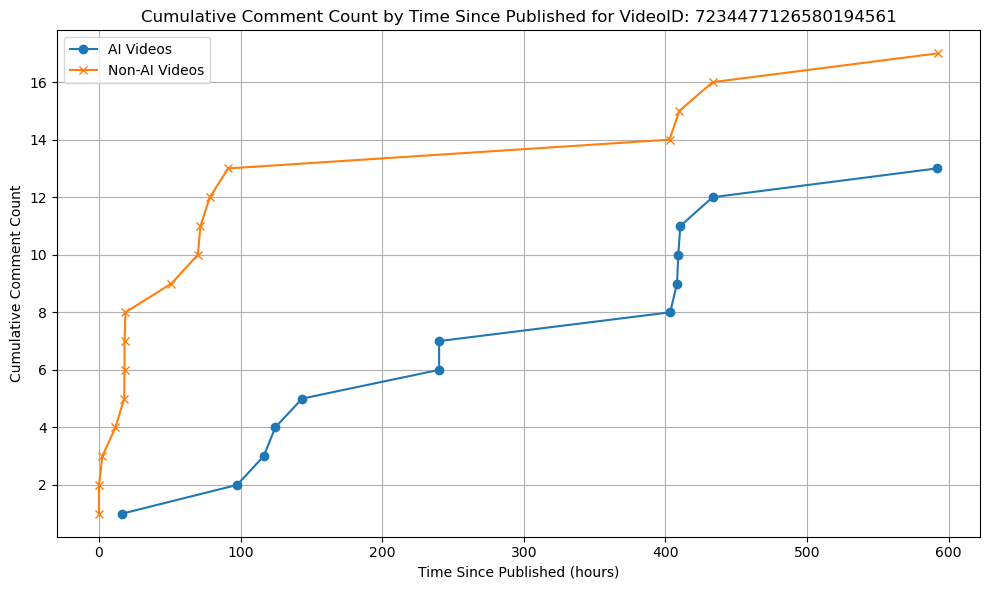

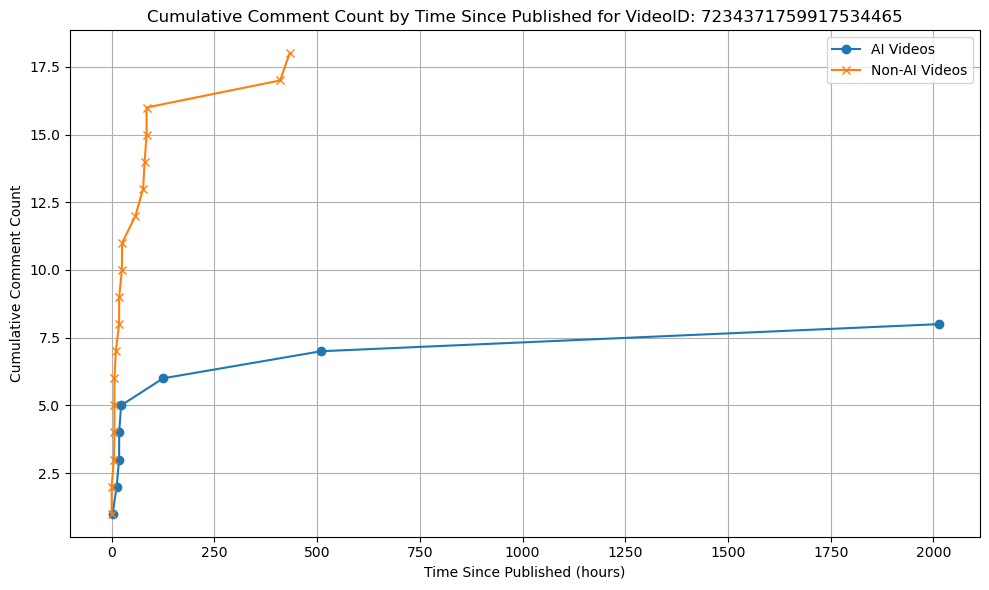

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# 動画情報とコメント情報を結合
merged_df = pd.merge(df_comments, df_videos, on='videoId')

# 動画が投稿されてからの時間差を計算
merged_df['time_since_published'] = (merged_df['commentDate'] - merged_df['publishedDate']).dt.total_seconds() / 3600  # 時間単位
merged_df['time_since_published'] = merged_df['time_since_published'].astype(int)

# 'AI'という文字列が含まれているかどうかを判定する列を追加
merged_df['contains_ai'] = merged_df['text'].str.contains('AI', case=False)

# 動画ごとにコメント数を集計（AIを含む動画）
ai_comment_count_by_video = ai_videos.groupby(['videoId', 'time_since_published']).size().reset_index(name='comment_count')
ai_comment_count_by_video['cumulative_comment_count'] = ai_comment_count_by_video.groupby('videoId')['comment_count'].cumsum()

# 動画ごとにコメント数を集計（AIを含まない動画）
non_ai_comment_count_by_video = non_ai_videos.groupby(['videoId', 'time_since_published']).size().reset_index(name='comment_count')
non_ai_comment_count_by_video['cumulative_comment_count'] = non_ai_comment_count_by_video.groupby('videoId')['comment_count'].cumsum()

mered_df = merged_df.sort_values('publishedDate')

# 動画ごとに累積折れ線グラフを作成して表示
unique_video_ids = merged_df['videoId'].unique()
for video_id in unique_video_ids:
    plt.figure(figsize=(10, 6))
    
    # AIを含む動画の累積折れ線グラフ
    ai_data = ai_comment_count_by_video[ai_comment_count_by_video['videoId'] == video_id]
    plt.plot(ai_data['time_since_published'], ai_data['cumulative_comment_count'], marker='o', label='AI Videos')
    
    # AIを含まない動画の累積折れ線グラフ
    non_ai_data = non_ai_comment_count_by_video[non_ai_comment_count_by_video['videoId'] == video_id]
    plt.plot(non_ai_data['time_since_published'], non_ai_data['cumulative_comment_count'], marker='x', label='Non-AI Videos')
    
    plt.xlabel('Time Since Published (hours)')
    plt.ylabel('Cumulative Comment Count')
    plt.title(f'Cumulative Comment Count by Time Since Published for VideoID: {video_id}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


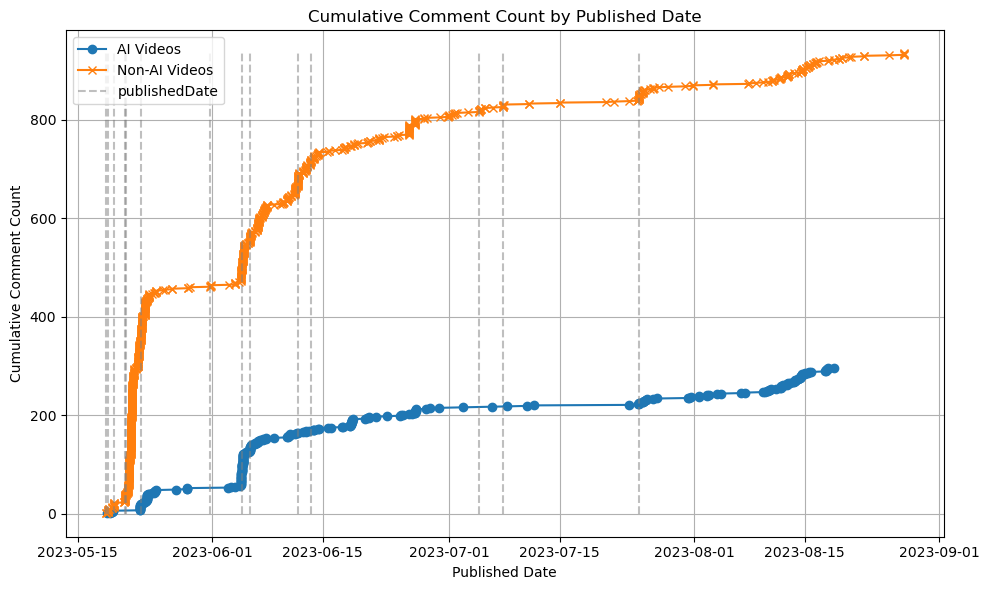

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# 動画情報とコメント情報を結合
merged_df = pd.merge(df_comments, df_videos, on='videoId')

# 'AI'という文字列が含まれているかどうかを判定する列を追加
merged_df['contains_ai'] = merged_df['text'].str.contains('AI', case=False)

# 'AI'を含む動画のデータ
ai_videos = merged_df[merged_df['contains_ai']]
# 'AI'を含まない動画のデータ
non_ai_videos = merged_df[~merged_df['contains_ai']]

# 動画ごとにコメント数を集計（AIを含む動画）
ai_comment_count_by_time = ai_videos.groupby('commentDate').size().cumsum()
# 動画ごとにコメント数を集計（AIを含まない動画）
non_ai_comment_count_by_time = non_ai_videos.groupby('commentDate').size().cumsum()

# グラフを作成
plt.figure(figsize=(10, 6))

# ユニークなpublishedDateの値を取得
unique_published_dates = merged_df['publishedDate'].sort_values().unique()

# グラフをプロット
plt.plot(ai_comment_count_by_time.index, ai_comment_count_by_time.values, marker='o', label='AI Videos')
plt.plot(non_ai_comment_count_by_time.index, non_ai_comment_count_by_time.values, marker='x', label='Non-AI Videos')
plt.vlines(unique_published_dates, ymin=0, ymax=max(ai_comment_count_by_time.max(), non_ai_comment_count_by_time.max()), colors='gray', linestyle='dashed', alpha=0.5, label='publishedDate')


plt.xlabel('Published Date')
plt.ylabel('Cumulative Comment Count')
plt.title('Cumulative Comment Count by Published Date')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


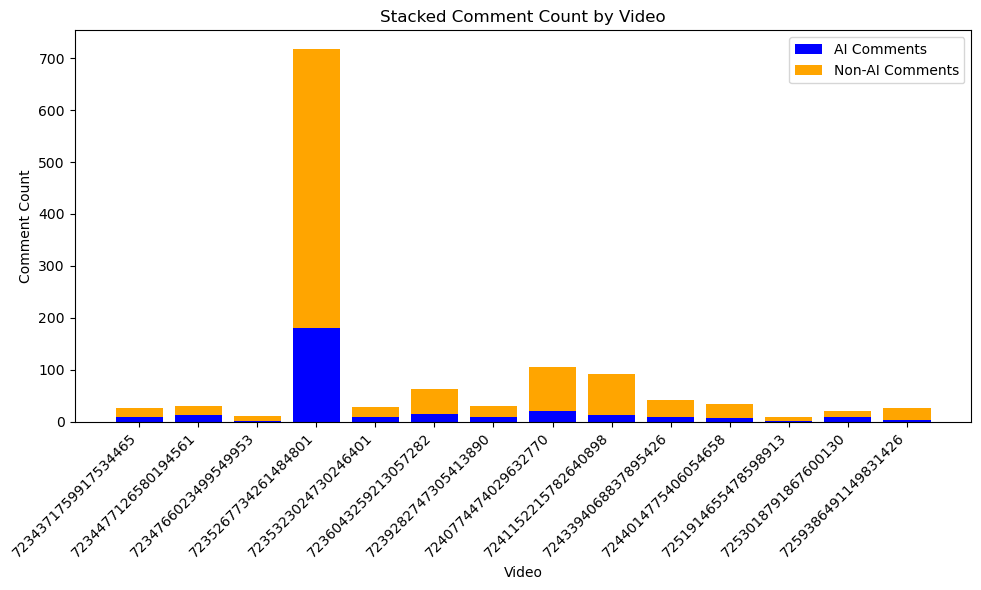

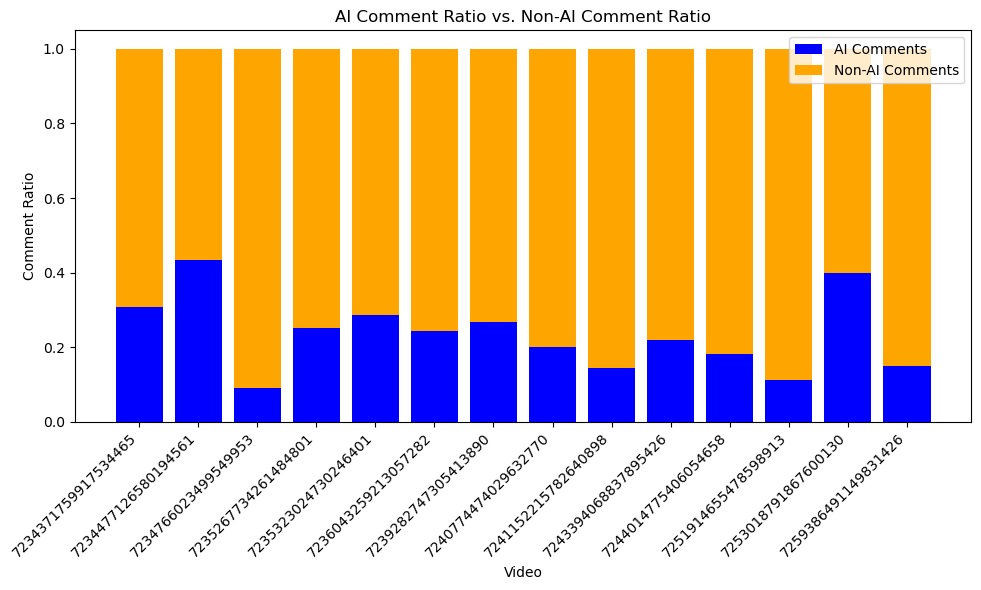

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# 動画情報とコメント情報を結合
merged_df = pd.merge(df_comments, df_videos, on='videoId')

# 'AI'という文字列が含まれているかどうかを判定する列を追加
merged_df['contains_ai'] = merged_df['text'].str.contains('AI', case=False)

# 動画ごとにコメント数を集計
video_comment_count = merged_df.groupby('videoId').size()

# 動画ごとにAIを含むコメント数を集計
ai_comment_count = merged_df[merged_df['contains_ai']].groupby('videoId').size()

# 動画ごとに非AIコメント数を集計
non_ai_comment_count = video_comment_count - ai_comment_count

# グラフを作成して表示
plt.figure(figsize=(10, 6))
plt.bar(video_comment_count.index, ai_comment_count, label='AI Comments', color='blue')
plt.bar(video_comment_count.index, non_ai_comment_count, bottom=ai_comment_count, label='Non-AI Comments', color='orange')
plt.xlabel('Video')
plt.ylabel('Comment Count')
plt.title('Stacked Comment Count by Video')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# 動画ごとに比率を計算して新しいDataFrameを作成
ratios_df = pd.DataFrame({
    'VideoID': video_comment_count.index,
    'TotalComments': video_comment_count.values,
    'AIComments': ai_comment_count.values,
})
ratios_df['NonAIComments'] = ratios_df['TotalComments'] - ratios_df['AIComments']
ratios_df['AICommentRatio'] = ratios_df['AIComments'] / ratios_df['TotalComments']
ratios_df['NonAICommentRatio'] = ratios_df['NonAIComments'] / ratios_df['TotalComments']

# グラフを作成して表示
plt.figure(figsize=(10, 6))
plt.bar(ratios_df.index, ratios_df['AICommentRatio'], label='AI Comments', color='blue')
plt.bar(ratios_df.index, ratios_df['NonAICommentRatio'], bottom=ratios_df['AICommentRatio'], label='Non-AI Comments', color='orange')
plt.xlabel('Video')
plt.ylabel('Comment Ratio')
plt.title('AI Comment Ratio vs. Non-AI Comment Ratio')
plt.xticks(ratios_df.index, ratios_df['VideoID'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

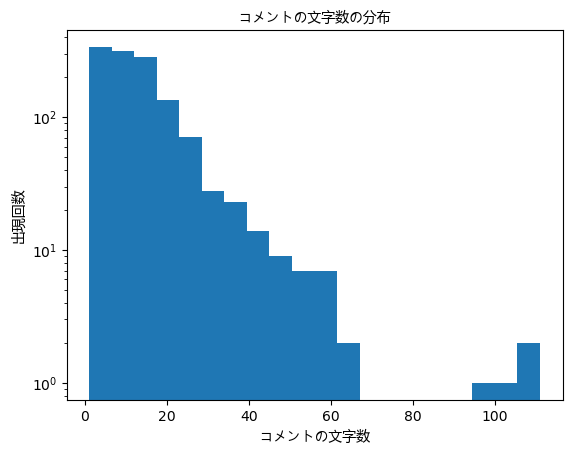

コメントの数： 1231
平均文字数： 13.546709991876524
中央値文字数： 11.0
最小文字数： 1
最大文字数： 111
標準偏差： 11.455457628769732
最長のコメント： めっちゃカワイイやん！これが現代の若者のスタイルなんやな。流行りのダンスもすごいし、オシャレなコーディネートもばっちりや！こんな子が近くにいたら、話しかけてみたいなぁ。若さってすごいなぁ、エネルギッシュな感じが溢れてるわ。


In [50]:
statistics = myf.get_statistics(df_comments['text'],channel)

In [19]:
lang_percentages = myf.lang_dist(df_comments['txt'])

# 言語判定結果を保存
with open(f"data/{channel}/{channel}_lang_dist.json", "w", encoding="utf-8") as f:
    json.dump(lang_percentages, f, ensure_ascii=False, indent=4)

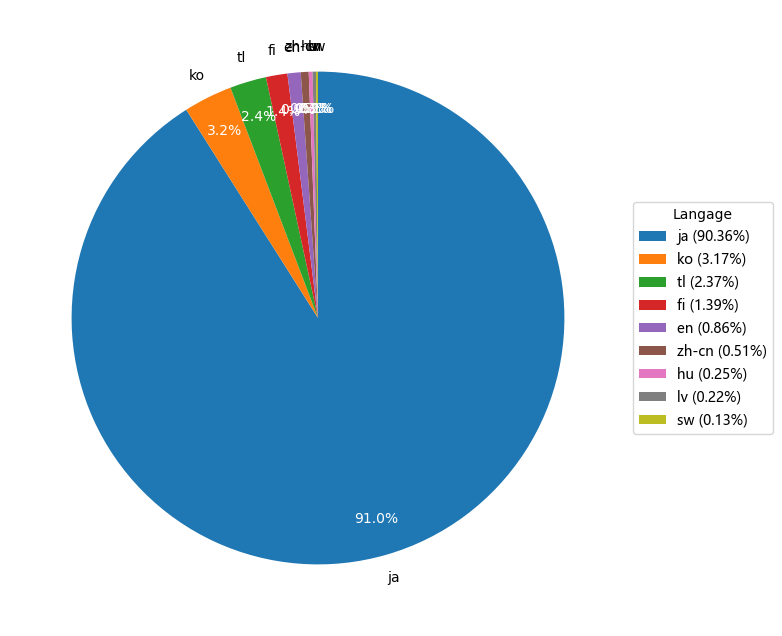

グラフを保存しました: data/jinguji_ai_/jinguji_ai__lang_dist.png


<Figure size 640x480 with 0 Axes>

In [20]:
file_path = f"data/{channel}/{channel}_lang_dist.json"
with open(file_path) as f:
    lang_percentages = json.load(f)

# ラベルと割合のデータを準備
labels = list(lang_percentages.keys())
sizes = list(lang_percentages.values())

# 割合の大きい順にソート
labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True))

labels_tmp = []
sizes_tmp = []
for label, size in zip(labels, sizes):
    if size >= 0.001:
        labels_tmp.append(label)
        sizes_tmp.append(size)
labels = labels_tmp
sizes = sizes_tmp

# 円グラフを描画
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, startangle=90, 
                                  counterclock=False, autopct='%1.1f%%', pctdistance=0.85)

# ラベルの位置を外側に配置
for text in texts:
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')

# 割合の値を表示
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')

# 凡例を作成し、外側に配置
legend = ax.legend(wedges, labels, title='Langage', loc='center left', 
                   bbox_to_anchor=(1, 0.5), fontsize=30, prop=font_prop)

# 凡例に値を表示
for i, text in enumerate(legend.get_texts()):
    value = sizes[i]*100
    text.set_text(f'{text.get_text()} ({value:.2f}%)')

# グラフを表示
plt.show()

# グラフを保存
save_file_path = f"data/{channel}/{channel}_lang_dist.png"
plt.savefig(save_file_path, bbox_inches='tight')
print("グラフを保存しました:", save_file_path)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# 各videoIdのコメント数をカウントし、上位10個を選択
top_video_ids = df_comments['videoId'].value_counts().head(10).index.tolist()

# videoIdごとにtextをまとめる
grouped_texts = df_comments.groupby('videoId')['text'].apply(' '.join)

# tf-idf計算
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(grouped_texts)
print(tfidf_matrix)
feature_names = vectorizer.get_feature_names_out()

# 上位のvideoIdごとのワードクラウドを作成
for video_id, row in zip(grouped_texts.index, tfidf_matrix):
    if video_id not in top_video_ids:
        continue

    tfidf_scores = dict(zip([feature_names[i] for i in row.indices], row.data))

    wc = WordCloud(background_color='white').generate_from_frequencies(tfidf_scores)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for videoId: {video_id}')
    plt.show()

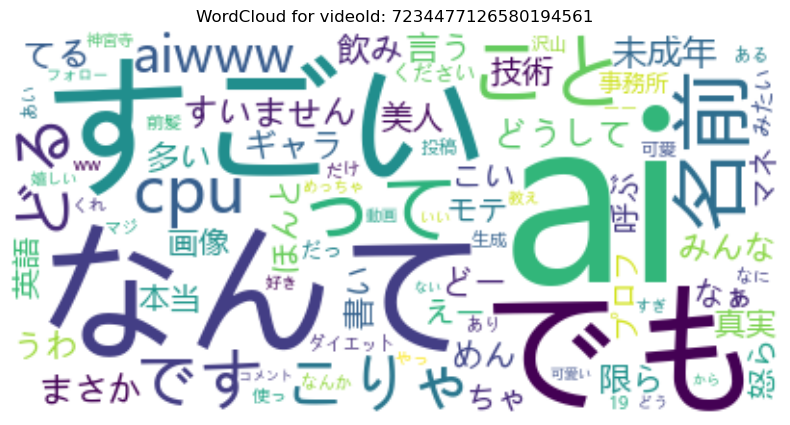

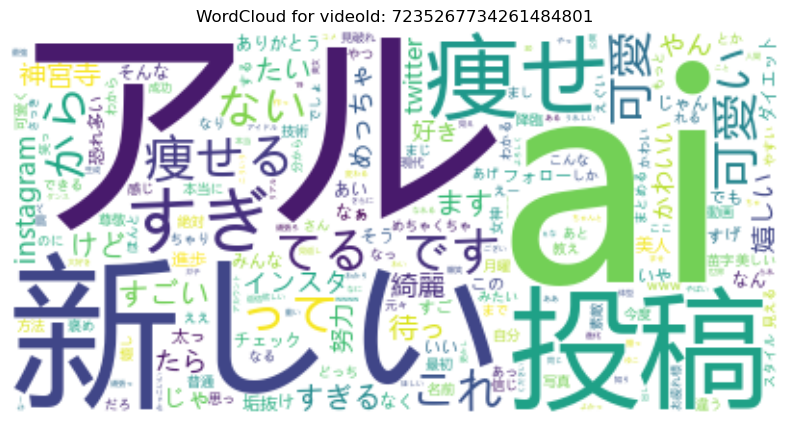

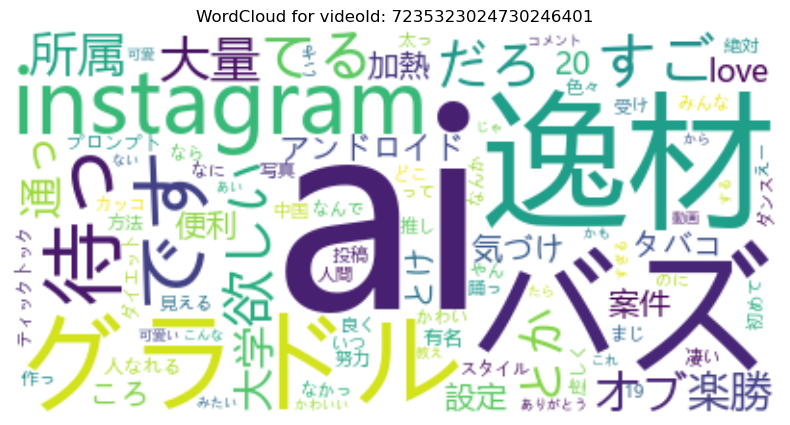

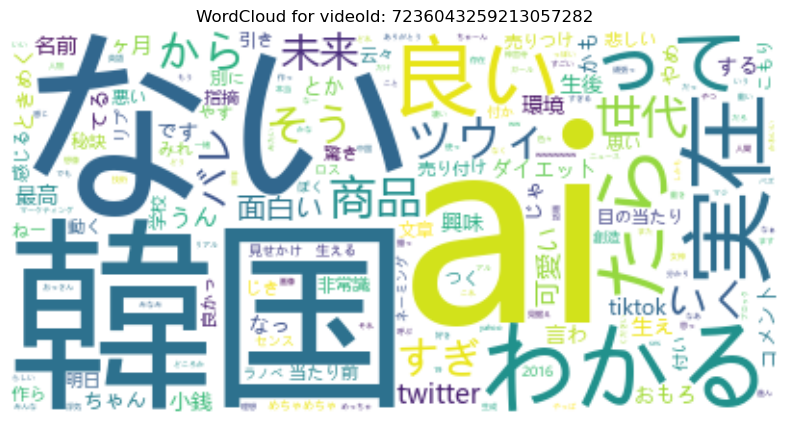

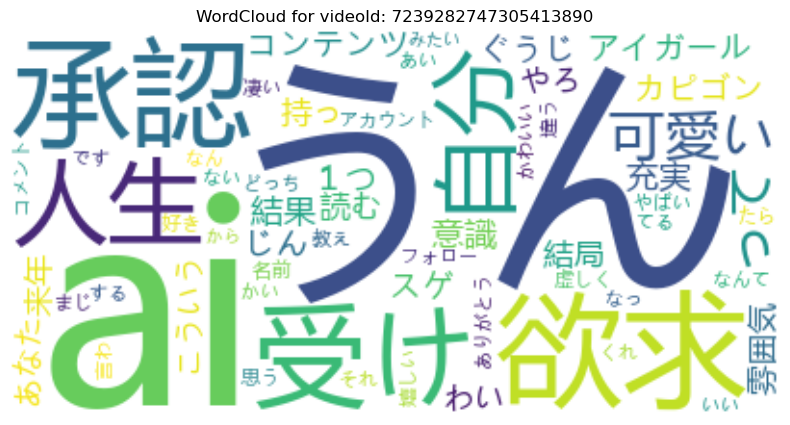

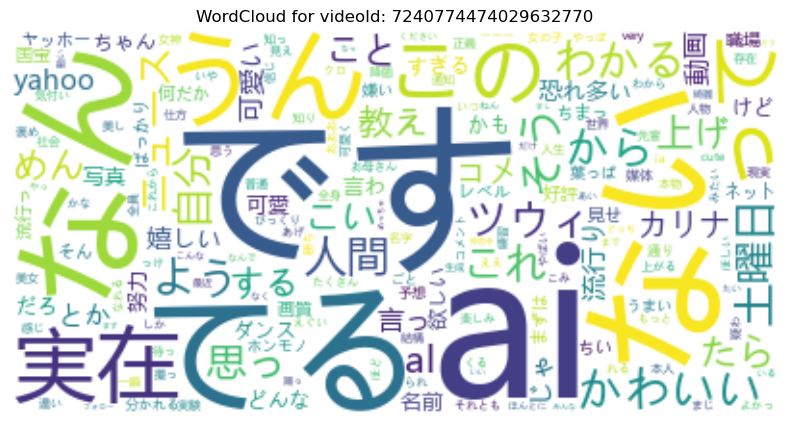

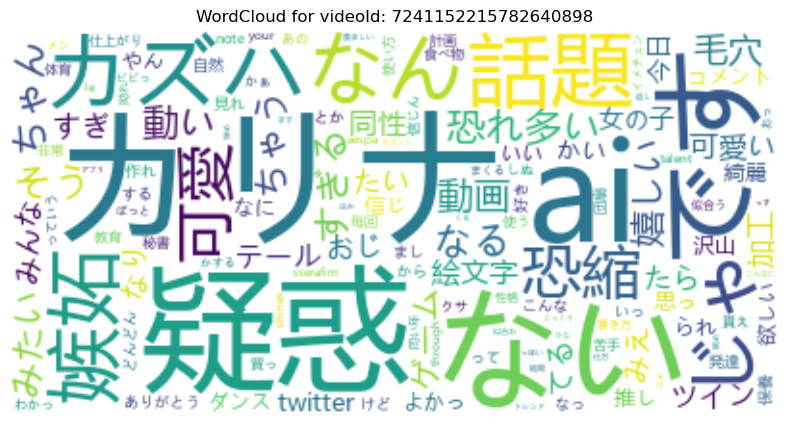

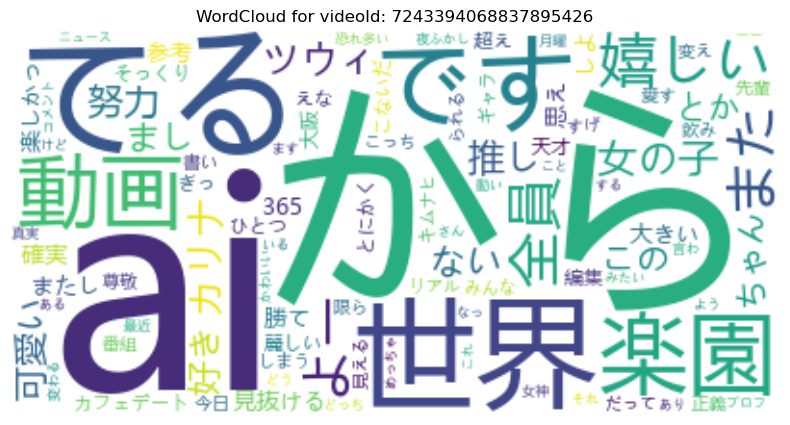

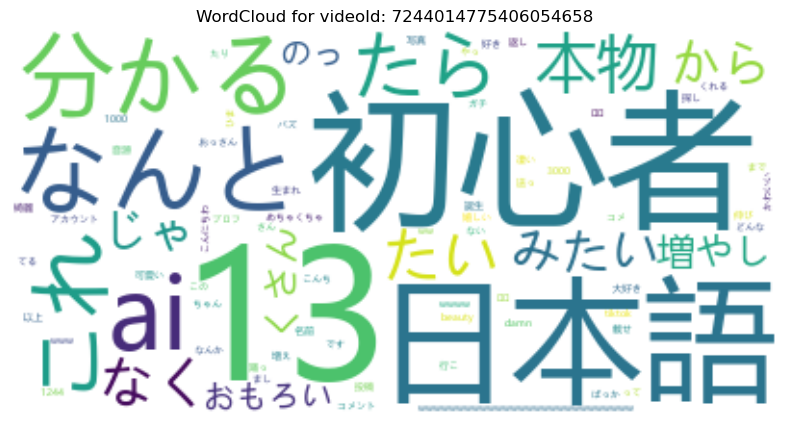

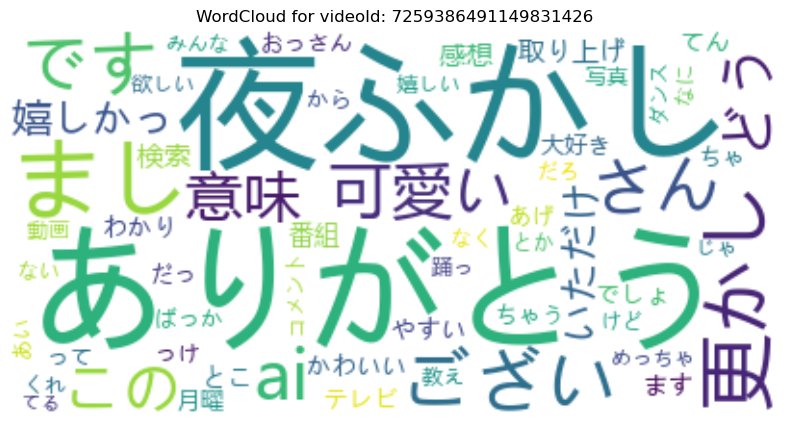

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from janome.tokenizer import Tokenizer
import matplotlib.pyplot as plt

# 各videoIdのコメントをまとめる
grouped_texts = df_comments.groupby('videoId')['text'].apply(' '.join)

# 日本語テキストを分かち書き
def tokenize_japanese_text(text):
    t = Tokenizer()
    tokens = t.tokenize(text)
    return ' '.join([token.surface for token in tokens])

grouped_texts_jp = grouped_texts.apply(tokenize_japanese_text)

# tf-idf計算
vectorizer = TfidfVectorizer(stop_words=None)  # 日本語ではストップワードの指定不要
tfidf_matrix = vectorizer.fit_transform(grouped_texts_jp)
feature_names = vectorizer.get_feature_names_out()

# 上位のvideoIdごとのワードクラウドを作成
for video_id, row in zip(grouped_texts_jp.index, tfidf_matrix):
    if video_id not in top_video_ids:
        continue

    tfidf_scores = dict(zip([feature_names[i] for i in row.indices], row.data))

    wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(tfidf_scores)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for videoId: {video_id}')
    plt.show()
